<a href="https://colab.research.google.com/github/Yogesh-Rebari/Spam-SMS/blob/main/spamsms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
#reading the CSV file
df = pd.read_csv("/content/sms.csv")


In [ ]:
#displaying the dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#dataset size - 5572 rows x 5 columns
df.shape

(5574, 5)

Data Cleaning

In [ ]:
#printing the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5574 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


Pandas Profiling

In [ ]:
! pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: ` pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)'


In [ ]:
!pip install ydata-profiling

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9b5d65ea9beee68eb0c49eecf1a1f28af9f83617b20089f7da4065cd254323c7
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
profile = ProfileReport(df, title='Spam SMS', html={'style':{'full_width':True}})

In [ ]:
profile.to_widgets()

/usr/local/lib/python3.11/dist-packages/ydata_profiling/profile_report.py:528: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file="your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#column 2, 3, 4 have majority missing values, so it is better to drop them.
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
#displaying the edited dataframe
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ì_ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#renaming the column names to a better and meaningful column name
df.rename(columns = {'v1':'result', 'v2':'input'}, inplace=True)

In [ ]:
#displaying the edited dataframe
df

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ì_ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


<ipython-input-51-da4ae8f72685>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='result', data=df, palette="viridis")


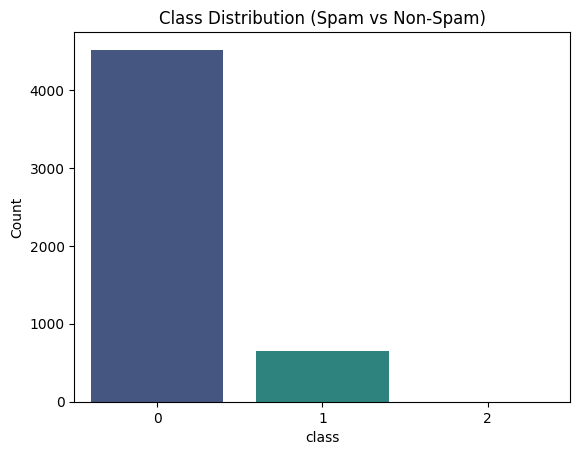

In [ ]:
sns.countplot(x='result', data=df, palette="viridis")
plt.title("Class Distribution (Spam vs Non-Spam)")
plt.xlabel("class")
plt.ylabel("Count")
plt.show()

<ipython-input-54-13a8a1817863>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['input'].apply(lambda x: len(x.split()))


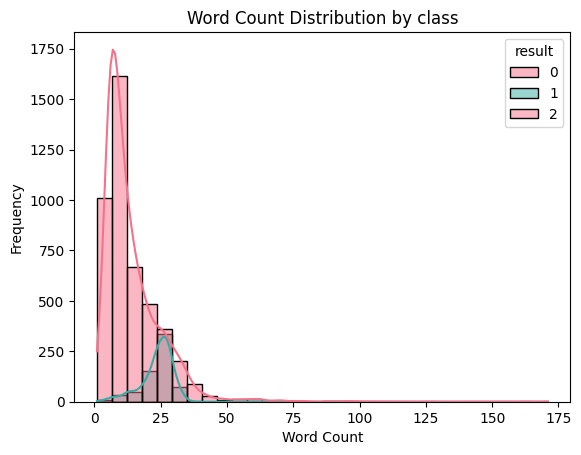

In [ ]:
df['word_count'] = df['input'].apply(lambda x: len(x.split()))
# Change 'class' to 'result' in the hue parameter
sns.histplot(data=df, x='word_count', hue='result', bins=30, kde=True, palette="husl")
plt.title("Word Count Distribution by class")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
encoder = LabelEncoder()
df['result'] = encoder.fit_transform(df['result'])

In [ ]:
#displaying the edited dataframe
df.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check if there is any NULL value
df.isnull().sum()

,0
result,0
input,0


In [ ]:
#check if there is any DUPLICATE values
df.duplicated().sum()

404

In [ ]:
#the dataset has DUPLICATE values, so we will have to REMOVE them
df = df.drop_duplicates(keep='first')

#displaying the edited dataframe
df

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will Ì_ b going to esplanade fr home?
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


EDA - Exploratory Data Analysis

In [ ]:
#checking the number of SPAM vs not SPAM messages
df['result'].value_counts()

,count
result,
0,4516
1,653
2,1


In [ ]:
653*100.0/5169

12.633004449603405

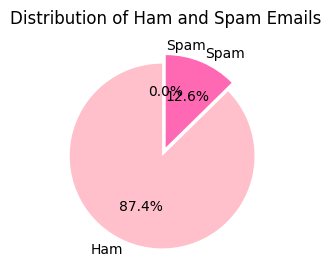

In [ ]:
# Count ham and spam emails
counts = df['result'].value_counts()

# Define labels and colors
labels = counts.index.map(lambda x: 'Ham' if x == 0 else 'Spam').tolist()
colors = ['#FFC0CB', '#FF69B4']  # Light pink for Ham, Hot pink for Spam

# Create the pie chart
plt.figure(figsize=(3, 3))
explode = (0.1, 0, 0)
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Rotate the pie chart
    explode=explode    # Slightly "explode" the first slice (Ham)
)

# Add a title
plt.title('Distribution of Ham and Spam Emails')

# Show the chart
plt.show()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk

nltk.download('punkt_tab')

#creating a new column with count of characters
df['countCharacters'] = df['input'].apply(len)

#creating a new column with count of words
df['countWords'] = df['input'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' function takes a string of text as input and returns a list of words

#creating a new column with count of sentences
df['countSentences'] = df['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' function takes a string of text as input and returns a list of sentences

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-19-38a5e52bf19e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countCharacters'] = df['input'].apply(len)
<ipython-input-19-38a5e52bf19e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countWords'] = df['input'].apply(lambda i:len(nltk.word_tokenize(i)))
<ipython-input-19-38a5e52bf19e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
#displaying the edited dataframe with the 3 new columns added
df.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#extracting the 5 number summary of the 3 new column values
df[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5170.000000,5170.000000,5170.000000
mean,78.959768,18.451838,1.965377
std,58.237215,13.324212,1.448464
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for not SPAM
df[df['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.455049,17.122896,1.820195
std,56.354282,13.492501,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for SPAM
df[df['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

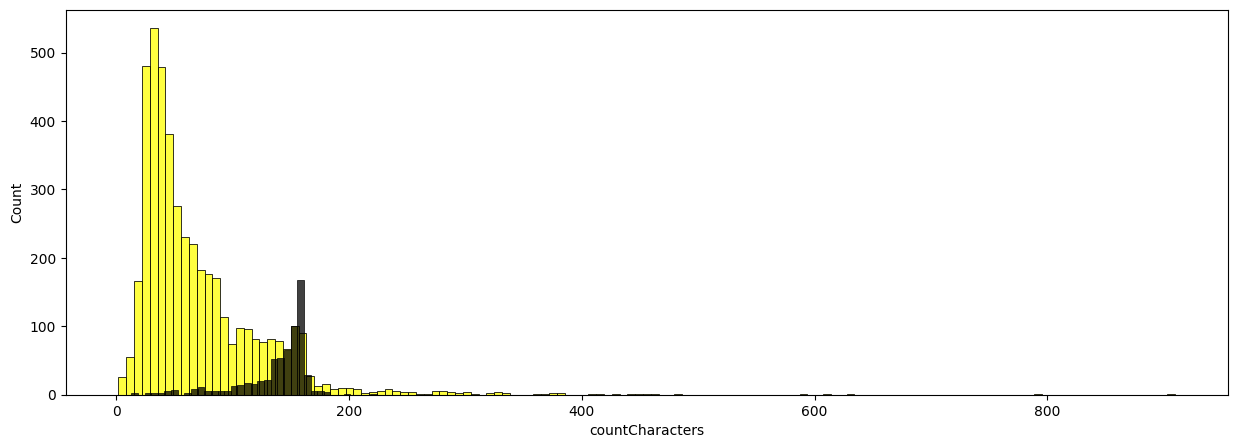

In [ ]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (15, 5))
sns.histplot(df[df['result'] == 0]['countCharacters'], color = "yellow")
sns.histplot(df[df['result'] == 1]['countCharacters'], color = "black")

#black -> SPAM, yellow -> not SPAM

<Axes: xlabel='countWords', ylabel='Count'>

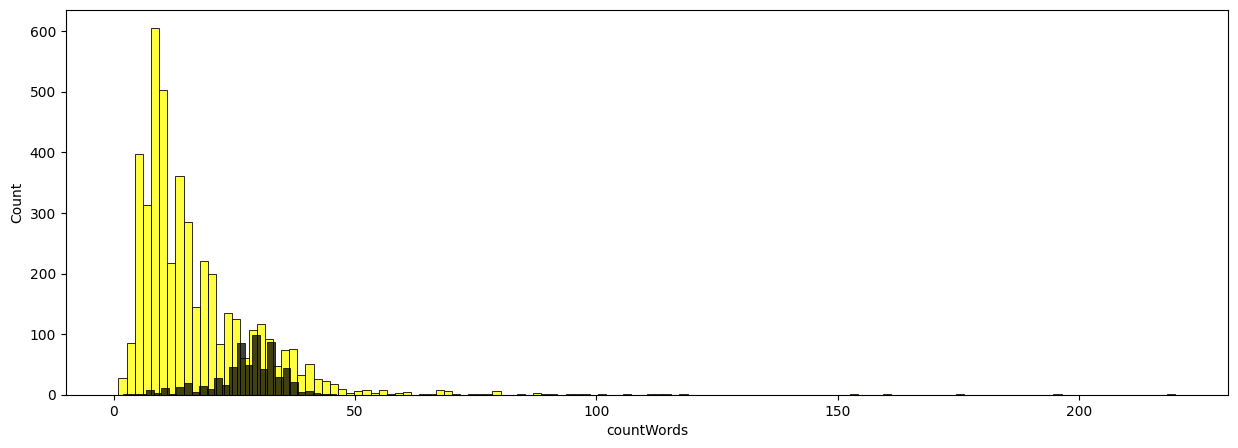

In [ ]:
plt.figure(figsize = (15, 5))
sns.histplot(df[df['result'] == 0]['countWords'], color = "yellow")
sns.histplot(df[df['result'] == 1]['countWords'], color = "black")

#black -> SPAM, yellow -> not SPAM

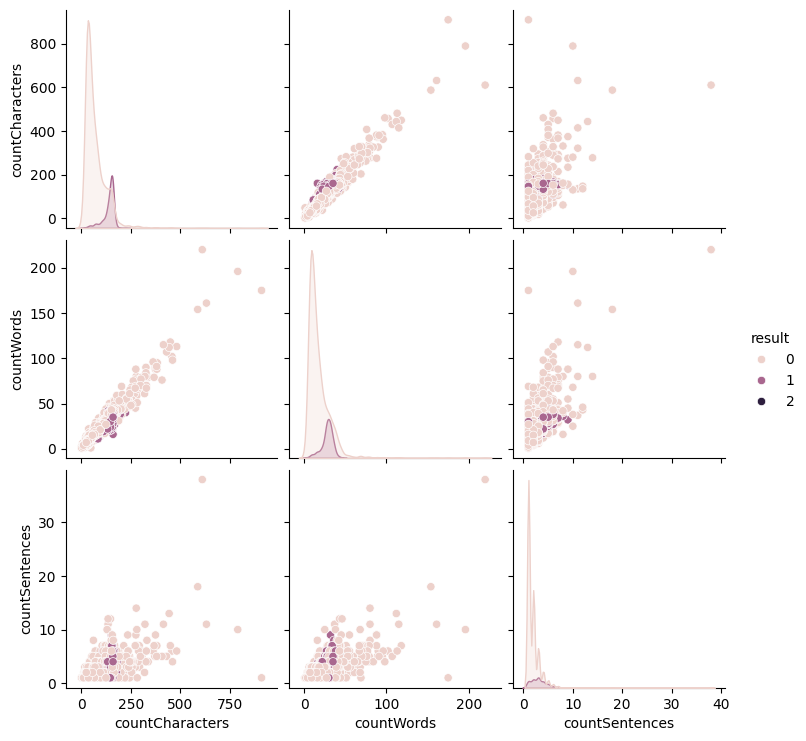

In [ ]:
#finding relationship between the columns
sns.pairplot(df, hue='result')

In [ ]:
#downloading the package which contains the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def transform_text (text):

    #converting to lower case
    text = text.lower()

    #tokenization
    text = nltk.word_tokenize(text)

    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)

    #updating the text after removed special characters
    text = removedSC[:]

    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)

    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]

    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

In [ ]:
#will create a new column to store the transformed text -> 'processed'
df['processed'] = df['input'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
df.head()

<ipython-input-29-5d3082266333>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['input'].apply(transform_text)


,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#will be creating word cloud for data visualization to display the most frequently occurring words in the processed dataset.
#using 'WordCloud' class

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

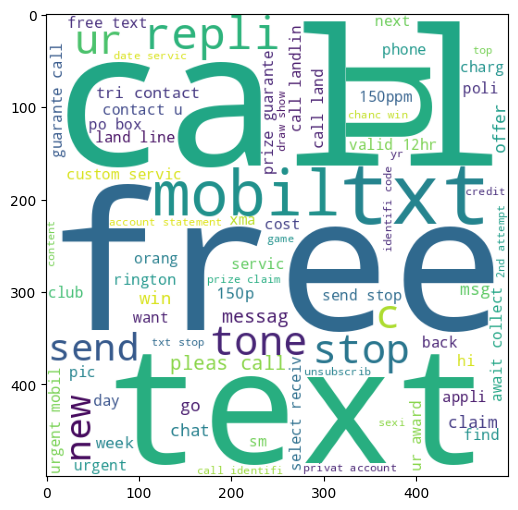

In [ ]:
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(df[df['result'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

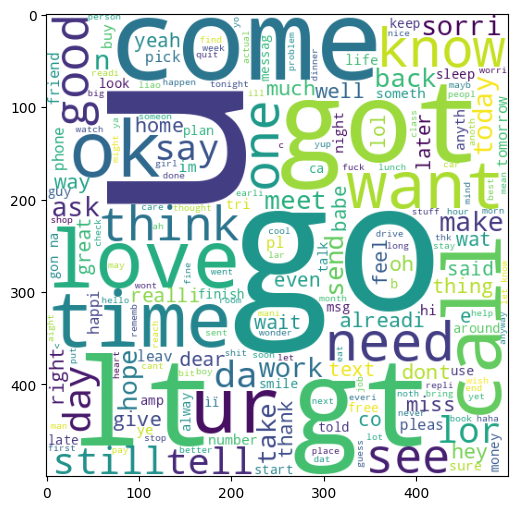

In [ ]:
#creating a wordcloud for the not SPAM messages
spamWC = wc.generate(df[df['result'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [ ]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in df[df['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [ ]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

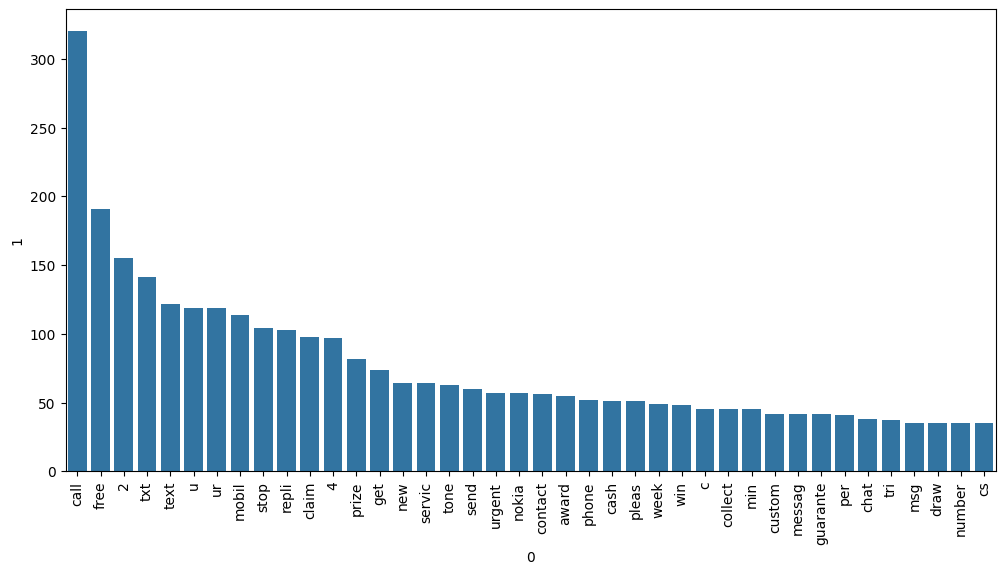

In [ ]:
#plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

**Model** **Building**

In [ ]:
#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [ ]:
#transforming the data of processed column
X = cv.fit_transform(df['processed']).toarray()

#printing size of X
X.shape

(5170, 6708)

In [ ]:
#storing the values of the 'result' column
y = df['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [ ]:
#creating the objects for the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[771 119]
 [ 24 120]]
0.502092050209205


In [ ]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9613152804642167
[[887   3]
 [ 37 107]]
0.9727272727272728


In [ ]:
#using 'TfidfVectorizer' for vectorization
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(df['processed']).toarray()

#storing the values of the 'result' column
y = df['result'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [ ]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8588007736943907
[[772 118]
 [ 28 116]]
0.49572649572649574


In [ ]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9468085106382979
[[890   0]
 [ 55  89]]
1.0


In [ ]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9613152804642167
[[887   3]
 [ 37 107]]
0.9727272727272728


In [ ]:
#model is PREPARED.
#the text which we will get, has to be transformed first, then vectorized and then apply the algorithm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
documents = df['processed'].tolist()  # Assign the text data to 'documents'
X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[894   1]
 [ 20 119]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.99      0.86      0.92       139

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

0.9796905222437138


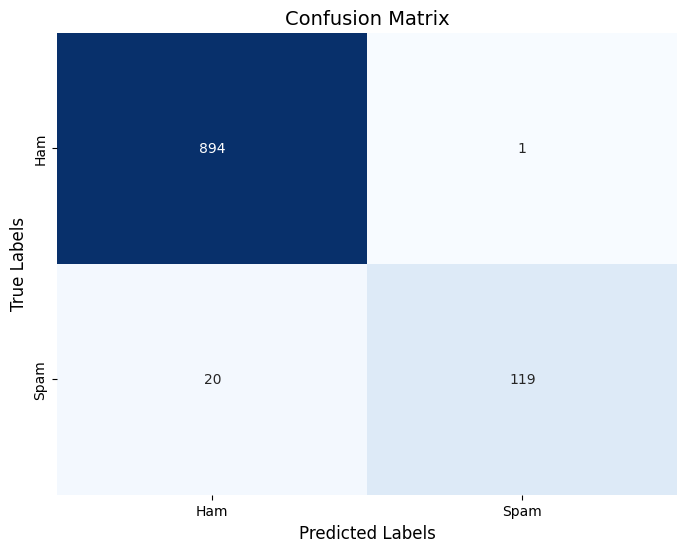

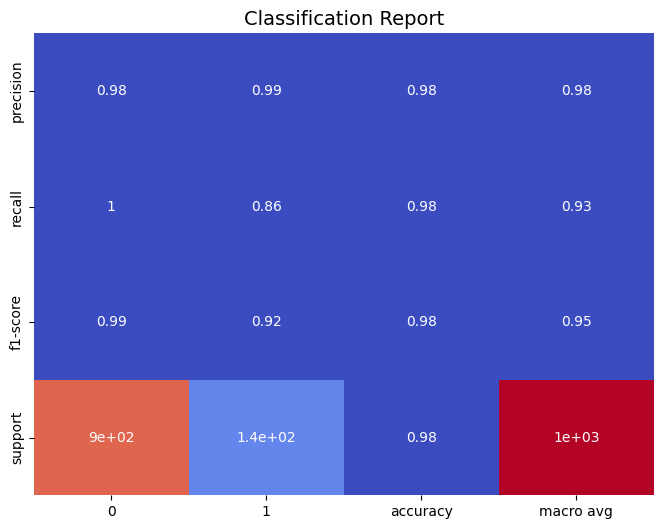

In [ ]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

# Add labels, title, and adjust the font size
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Visualizing the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a pandas DataFrame
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Classification Report', fontsize=14)
plt.show()

#now we have to host the website, for that pipeling needs to be done

In [ ]:
#we will pickle 2 files
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))